# Credit Card Fraud Detection

### Problem Statement
To predict fraudulent credit card transactions with the help of machine learning models.
##### Importing required libraries

In [10]:
import pandas as pd
pd.set_option("display.max_columns", 500)
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings

import sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report,precision_score, recall_score, accuracy_score, f1_score
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

code for google colab

In [11]:
# import io
# # from google.colab import files
# # uploded = files.upload()

# from google.colab import drive
# drive.mount("/content/gdrive/")
# credit = pd.read_csv("/content/gdrive/My Drive/creditcard.csv")
# df = credit.copy()
# df.head()

##### Importing Data set

In [12]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


##### Regular Sanity Checkup

In [13]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,1.673327e-15,-1.254995e-15,8.176030e-16,1.206296e-15,4.913003e-15,1.437666e-15,-3.800113e-16,9.572133e-16,1.039817e-15,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There is no null value

## EDA

In [15]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

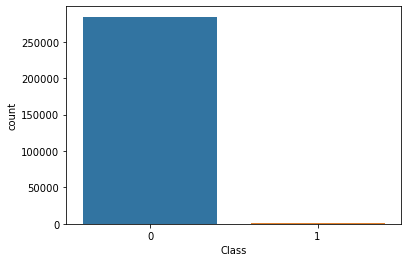

In [16]:
sns.countplot(df["Class"])
plt.show()

In [17]:
label = df["Class"].value_counts()
normal = round((label[0]/df["Class"].count())*100,3)
fraudulent = round((label[1]/df["Class"].count())*100,3)
print("normal creditcard transactions are {} percentage".format(normal))
print("fraudulent creditcard transactions are {} percentage".format(fraudulent))

normal creditcard transactions are 99.827 percentage
fraudulent creditcard transactions are 0.173 percentage


From the above obserations we can cearly observe that there are very little fraudulent transactions so there is high class imabalance

Checking the distribution of continous variable as per different class labels i.e normal or fraudulent

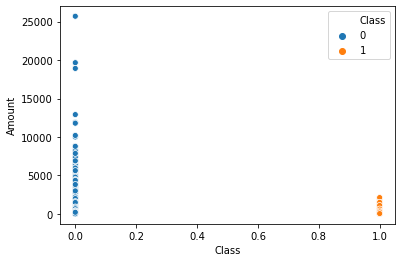

In [18]:
sns.scatterplot(x = "Class", y = "Amount", hue = "Class", data = df)
plt.show()

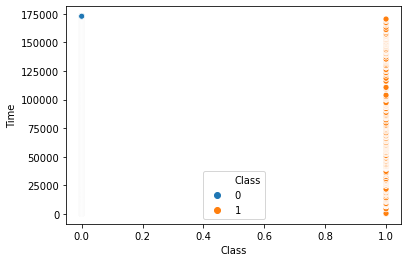

In [19]:
sns.scatterplot(x = "Class", y = "Time", hue = "Class", data = df)
plt.show()

## Data Preparation
Dropping unnecessary columns

In [20]:
df.drop("Time", axis =1,inplace = True)

In [21]:
# Defining Independent varibale and target variable
y = df["Class"]
df.drop("Class", axis =1, inplace = True)
X = df

In [22]:
# Splitting Dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.70, test_size = 0.30, random_state = 42)

In [23]:
X_train.shape, X_test.shape

((199364, 29), (85443, 29))

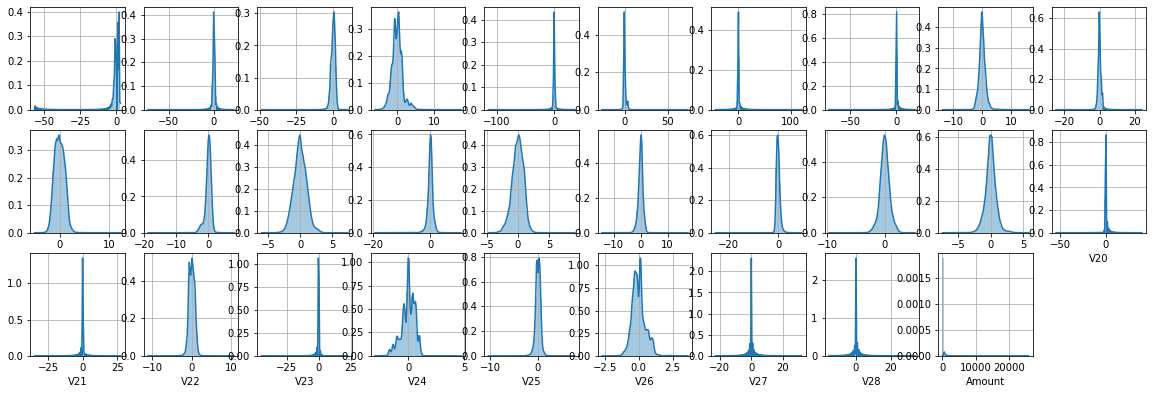

In [24]:
# Plotting Distribution of variables

var = list(df.columns)
plt.figure(figsize = (20,20))
for i in var:
    plt.subplot(9,10, var.index(i)+1)
    sns.distplot(df[i])
    plt.grid()
plt.show()
    

There are some variables with high skewness so we have to convert them to normal distribution

In [25]:
pt = PowerTransformer(copy = False)
pt.fit_transform(X_train)
pt.transform(X_test)

array([[-4.18364953,  7.79983841, -6.67283651, ..., -4.76978665,
        -3.40066555,  1.60046698],
       [-0.03977015, -1.58333823, -0.25001327, ...,  0.09360672,
         0.32749998,  1.78884857],
       [ 0.81304767, -0.45045274, -0.03547839, ...,  0.02029389,
         0.02678043,  0.22557589],
       ...,
       [ 0.25958763, -0.69953647,  0.76412165, ...,  0.13668507,
         0.19334261,  1.26503941],
       [ 1.47378899,  0.02346921, -1.15579502, ..., -0.16065488,
        -0.08387418, -1.57502145],
       [ 0.54146702, -0.13130331,  0.95742032, ...,  0.19082209,
         0.1222844 , -0.42704166]])

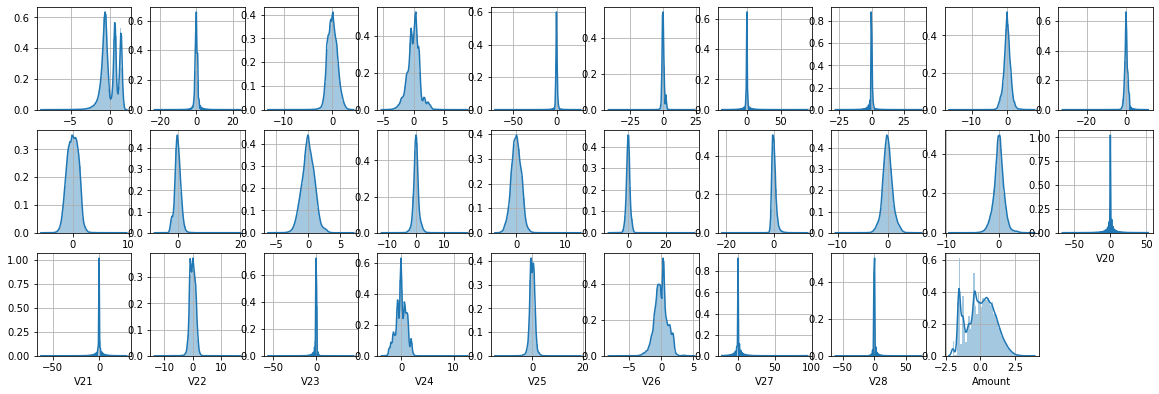

In [26]:
# Again plotting the distribution of variables for confirmation
plt.figure(figsize = (20,20))
for i in var:
    plt.subplot(9,10, var.index(i)+1)
    sns.distplot(X_train[i])
    plt.grid()
plt.show()
    

## Model Building With Imbalanced Dataset

    1) Logistic Regression
    2) SVM Classifier
    3) Random Forest Classifier
    4) XGBoost


##### 1)Logistic Regression

In [19]:
num_c = [20, 40, 50, 60]
for i in num_c:
    lr2 = LogisticRegression(C = i, class_weight = None, dual = False, fit_intercept = True, intercept_scaling=1,
                            l1_ratio = None, max_iter = 100, multi_class = "auto", n_jobs = -1, penalty = "l2", 
                             random_state = 1000, verbose = 0, warm_start = False)
    lr2.fit(X_train, y_train)
    y_predict_lr2 = lr2.predict_proba(X_test)
    print("c: ",i,"ROC score is ", roc_auc_score(y_test, y_predict_lr2[:,1]))

c:  20 ROC score is  0.9817554279732923
c:  40 ROC score is  0.9817528421569433
c:  50 ROC score is  0.98175249738143
c:  60 ROC score is  0.9817519802181601


##### 2) SVM Classifier

In [27]:
# SVM Classifier
from sklearn.svm import SVC
skf = StratifiedKFold(n_splits=3)
param_grid = {"C": [0.1, 1, 10, 100, 1000]}
folds = 5
# sv = SVC()
# RF = RandomForestClassifier()
folds = 5
i=1
for train_index,test_index in skf.split(X_train,y_train):
    print('{} of KFold {}'.format(i,skf.n_splits))
    X_train_cv,X_test_cv = X_train.iloc[train_index],X_train.iloc[test_index]
    y_train_cv,y_test_cv = y_train.iloc[train_index],y_train.iloc[test_index]

    # specify model
    sv = SVC(C = 1)  

    # set up GridSearchCV()
    model_cv = GridSearchCV(estimator = sv, 
                            param_grid = param_grid, 
                            scoring= 'roc_auc', 
                            cv = StratifiedKFold(n_splits = 5, shuffle = True), 
                            verbose = 2,
                            n_jobs=-1,
                            return_train_score=True)  
    
    model_cv.fit(X_train_cv, y_train_cv)
    i+=1

#print the evaluation result by choosing a evaluation metric

y_pred = model_cv.predict(X_test_cv)
print(roc_auc_score(y_test_cv, y_pred))
  
#print the optimum value of hyperparameters

print(model_cv.best_params_)

1 of KFold 3
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 11.6min finished


2 of KFold 3
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 13.1min finished


3 of KFold 3
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 12.4min finished


0.8558116052229225
{'C': 100}


In [35]:
# fiting The Model
clf = SVC(C = 100)
clf.fit(X_train, y_train)
y_pred_un = clf.predict(X_test)
print(roc_auc_score(y_test,y_pred_un))

0.8711887221860974


##### 3) RandomForest

In [20]:
skf = StratifiedKFold(n_splits=3)
param_grid = {'max_depth': [1,2,4,8,10],
          'n_estimators': [100,200, 300]}
folds = 5
RF = RandomForestClassifier()
i=1
for train_index,test_index in skf.split(X_train,y_train):
    print('{} of KFold {}'.format(i,skf.n_splits))
    X_train_cv,X_test_cv = X_train.iloc[train_index],X_train.iloc[test_index]
    y_train_cv,y_test_cv = y_train.iloc[train_index],y_train.iloc[test_index]

    # specify model
    RF = RandomForestClassifier(n_jobs=-1)  

    # set up GridSearchCV()
    model_cv = GridSearchCV(estimator = RF, 
                            param_grid = param_grid, 
                            scoring= 'roc_auc', 
                            cv = StratifiedKFold(), 
                            verbose = 2,
                            n_jobs=-1,
                            return_train_score=True)  
    
    model_cv.fit(X_train_cv, y_train_cv)
    i+=1

#print the evaluation result by choosing a evaluation metric

y_pred = model_cv.predict(X_test_cv)
print(roc_auc_score(y_test_cv, y_pred))
  
#print the optimum value of hyperparameters

print(model_cv.best_params_)

1 of KFold 3
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 94.1min finished


2 of KFold 3
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 58.0min finished


3 of KFold 3
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 49.0min finished


0.9067042871626317
{'max_depth': 10, 'n_estimators': 100}


In [21]:
# Fiting The Model
clf = RandomForestClassifier(n_jobs = -1, max_depth = 10, n_estimators = 200)
clf.fit(X_train, y_train)
y_pred_un = clf.predict_proba(X_test)
print(roc_auc_score(y_test,y_pred_un[:,1]))

0.9811379350291232


##### 4)XgBoost

In [22]:
skf = StratifiedKFold(n_splits=3)
i = 1
for train_index,test_index in skf.split(X_train,y_train):
    print('{} of KFold {}'.format(i,skf.n_splits))
    X_train_cv,X_test_cv = X_train.iloc[train_index],X_train.iloc[test_index]
    y_train_cv,y_test_cv = y_train.iloc[train_index],y_train.iloc[test_index]
    param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 
    xgb_model = XGBClassifier(max_depth = 2, n_estimators = 200)
    model_cv = GridSearchCV(estimator = xgb_model, 
                            param_grid = param_grid, 
                            scoring= 'roc_auc', 
                            cv = StratifiedKFold(), 
                            verbose = 2,
                            n_jobs=-1,
                            return_train_score=True)  

    model_cv.fit(X_train_cv, y_train_cv)
    i+=1
    
y_pred = model_cv.predict(X_test_cv)
print(roc_auc_score(y_test_cv, y_pred))
#print the optimum value of hyperparameters
print(model_cv.best_params_)

1 of KFold 3
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 15.1min finished


2 of KFold 3
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 14.1min finished


3 of KFold 3
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 14.7min finished


0.9066967497772
{'learning_rate': 0.2, 'subsample': 0.6}


In [24]:
# Fitting The Model
xgb_clf = XGBClassifier(max_depth = 2, n_estimator = 200,learning_rate = 0.2, subsample = 0.6, objective = "binary:logistic")
xgb_clf.fit(X_train, y_train)
y_pred_un = xgb_clf.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_un[:,1]))

[13:47:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.9875557588198749


Plot the important features to understand dataset

In [31]:
imp_var = []
for i in clf.feature_importances_:
    imp_var.append(i)
print('Top var =', imp_var.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', imp_var.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', imp_var.index(np.sort(clf.feature_importances_)[-3])+1)

Top var = 17
2nd Top var = 12
3rd Top var = 14


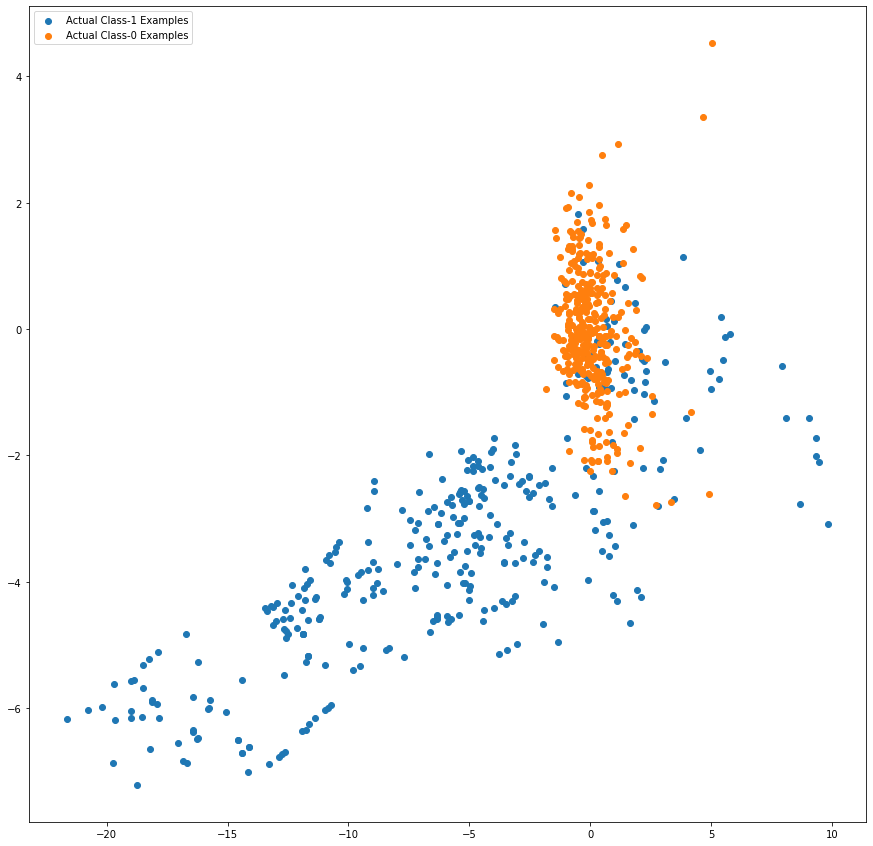

In [39]:
# Variable on Index-17 and Index-12 are the top 2 variables
top_var_index = imp_var.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = imp_var.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)
plt.rcParams['figure.figsize'] = [15, 15]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

### Model Building with Balanced Data set by using 
    
    - 1)Random Oversampling
    - 2)ADASYN
    - 3)SMOTE
    
    
#### 1)Random Oversampling
##### 1.1)Logistic Regression

In [48]:
num_c = [0.01, 0.1, 20, 30, 100]
for i in num_c:
    lr1 = LogisticRegression(C = i, penalty = "l2", solver = "lbfgs",
                             class_weight = "balanced", 
                             max_iter = 1000, 
                             random_state = 1000, tol = 0.0001,verbose = 0)
    lr1.fit(X_train, y_train)
    y_predict_lr1 = lr1.predict(X_test)
    print("c: ",i,"ROC score is ", roc_auc_score(y_test, y_predict_lr1))

c:  0.01 ROC score is  0.9495787360391774
c:  0.1 ROC score is  0.9486233630920572
c:  20 ROC score is  0.9485588900710858
c:  30 ROC score is  0.9485588900710858
c:  100 ROC score is  0.9485588900710858


##### 1.2) SVM Classifier

In [36]:
# SVM Classifier
from sklearn.svm import SVC
skf = StratifiedKFold(n_splits=3)
param_grid = {"C": [0.1, 1, 10, 100, 1000]}
folds = 5
# sv = SVC()
# RF = RandomForestClassifier()
folds = 5
i=1
for train_index,test_index in skf.split(X_train,y_train):
    print('{} of KFold {}'.format(i,skf.n_splits))
    X_train_cv,X_test_cv = X_train.iloc[train_index],X_train.iloc[test_index]
    y_train_cv,y_test_cv = y_train.iloc[train_index],y_train.iloc[test_index]

    # specify model
    sv = SVC(C = 1, class_weight = "balanced")  

    # set up GridSearchCV()
    model_cv = GridSearchCV(estimator = sv, 
                            param_grid = param_grid, 
                            scoring= 'roc_auc', 
                            cv = StratifiedKFold(n_splits = 5, shuffle = True), 
                            verbose = 2,
                            n_jobs=-1,
                            return_train_score=True)  
    
    model_cv.fit(X_train_cv, y_train_cv)
    i+=1

#print the evaluation result by choosing a evaluation metric

y_pred = model_cv.predict(X_test_cv)
print(roc_auc_score(y_test_cv, y_pred))
  
#print the optimum value of hyperparameters

print(model_cv.best_params_)

1 of KFold 3
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  9.1min finished


2 of KFold 3
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 11.5min finished


3 of KFold 3
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  9.6min finished


0.8995424934795229
{'C': 0.1}


In [42]:
# fiting The Model
clf = SVC(C = 0.1, gamma=0.001, kernel="rbf")
clf.fit(X_train, y_train)
y_pred_un = clf.predict(X_test)
print(roc_auc_score(y_test,y_pred_un))

0.8858770209878645


##### 1.3)Random Forest

In [51]:
skf = StratifiedKFold(n_splits=3)
param_grid = {'max_depth': [4,8,10],
          'n_estimators': [100,200, 300]}
folds = 5
RF = RandomForestClassifier()
folds = 5
i=1
for train_index,test_index in skf.split(X_train,y_train):
    print('{} of KFold {}'.format(i,skf.n_splits))
    X_train_cv,X_test_cv = X_train.iloc[train_index],X_train.iloc[test_index]
    y_train_cv,y_test_cv = y_train.iloc[train_index],y_train.iloc[test_index]

    # specify model
    RF = RandomForestClassifier(n_jobs=-1, class_weight = "balanced")  

    # set up GridSearchCV()
    model_cv = GridSearchCV(estimator = RF, 
                            param_grid = param_grid, 
                            scoring= 'roc_auc', 
                            cv = StratifiedKFold(n_splits = 5, shuffle = True), 
                            verbose = 2,
                            n_jobs=-1,
                            return_train_score=True)  
    
    model_cv.fit(X_train_cv, y_train_cv)
    i+=1

#print the evaluation result by choosing a evaluation metric

y_pred = model_cv.predict(X_test_cv)
print(roc_auc_score(y_test_cv, y_pred))
  
#print the optimum value of hyperparameters

print(model_cv.best_params_)

1 of KFold 3
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 173.3min finished


2 of KFold 3
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 36.0min finished


3 of KFold 3
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 36.7min finished


0.9431138191191019
{'max_depth': 4, 'n_estimators': 300}


In [53]:
rfc_clf = RandomForestClassifier(n_jobs = -1,max_depth = 4, n_estimators = 200, class_weight = "balanced")
rfc_clf.fit(X_train, y_train)
y_pred_un = rfc_clf.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_un[:,1]))

0.9830059718566645


##### 1.4)Using XGBoost

In [56]:
ros = RandomOverSampler(random_state=42)
X_train_cv, y_train_cv = ros.fit_resample(X_train, y_train)
X_test_cv, y_test_cv = ros.fit_resample(X_test, y_test)

#perform hyperparameter tuning
param_grid = {'learning_rate': [0.2, 0.6], 
          'subsample': [0.3, 0.6, 0.9],
          'max_depth' : [2,3,5]
          }          

# specify model
xgb_os = XGBClassifier(n_estimators=200)

# set up GridSearchCV()
model_cv_os = GridSearchCV(estimator = xgb_os, 
                          param_grid = param_grid, 
                          scoring= 'roc_auc', 
                          cv = StratifiedKFold(n_splits=5, shuffle=True), 
                          verbose = 2,
                          n_jobs=-1,
                          return_train_score=True)  
model_cv_os.fit(X_train_cv, y_train_cv)
#print the evaluation result by choosing a evaluation metric
y_pred = model_cv_os.predict(X_test_cv)
print(roc_auc_score(y_test_cv, y_pred))
#print the optimum value of hyperparameters
print(model_cv_os.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 63.7min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 198.9min finished


0.9268055376463831
{'learning_rate': 0.6, 'max_depth': 3, 'subsample': 0.6}


In [57]:
# Fitting The Data set
clf_os = XGBClassifier(max_depth=5, n_estimators=200,learning_rate = 0.2, subsample = 0.3,objective = 'binary:logistic')  #initialise the model with optimum hyperparameters
clf_os.fit(X_train_cv, y_train_cv)
y_pred_os = clf_os.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_os[:,1])) #print the evaluation score on the X_test by choosing the best evaluation metric

0.987665311239199


In [58]:
# print important features of randomover sampling

var_imp = []
for i in clf_os.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf_os.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf_os.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf_os.feature_importances_)[-3])+1)

Top var = 14
2nd Top var = 4
3rd Top var = 12


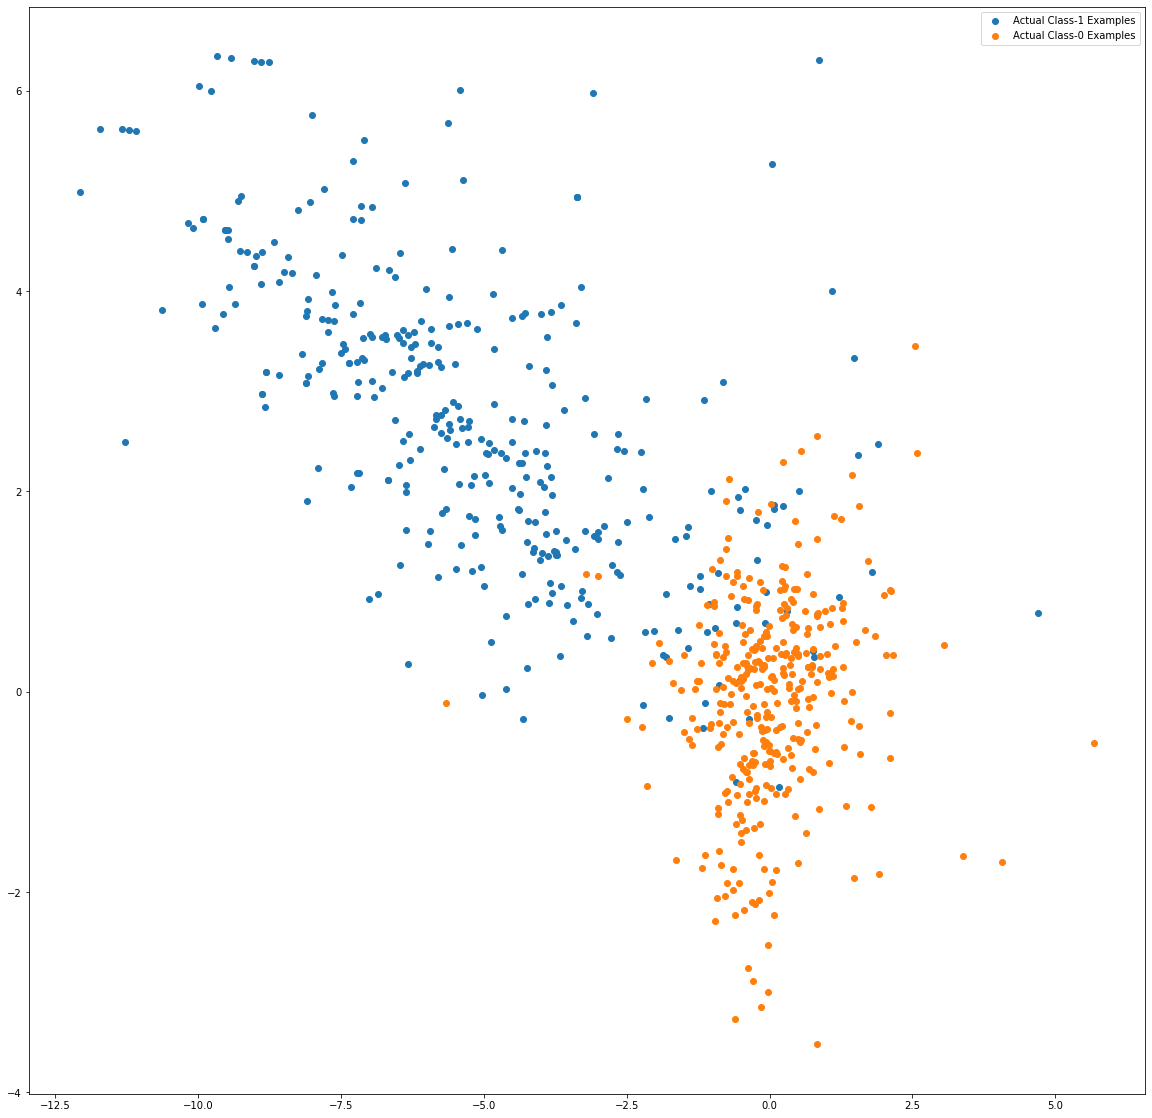

In [59]:
# PLotting the important variables
top_var_index = var_imp.index(np.sort(clf_os.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf_os.feature_importances_)[-2])
X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]
np.random.shuffle(X_train_0)
plt.rcParams['figure.figsize'] = [20, 20]
plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

#### 2)SMOTE

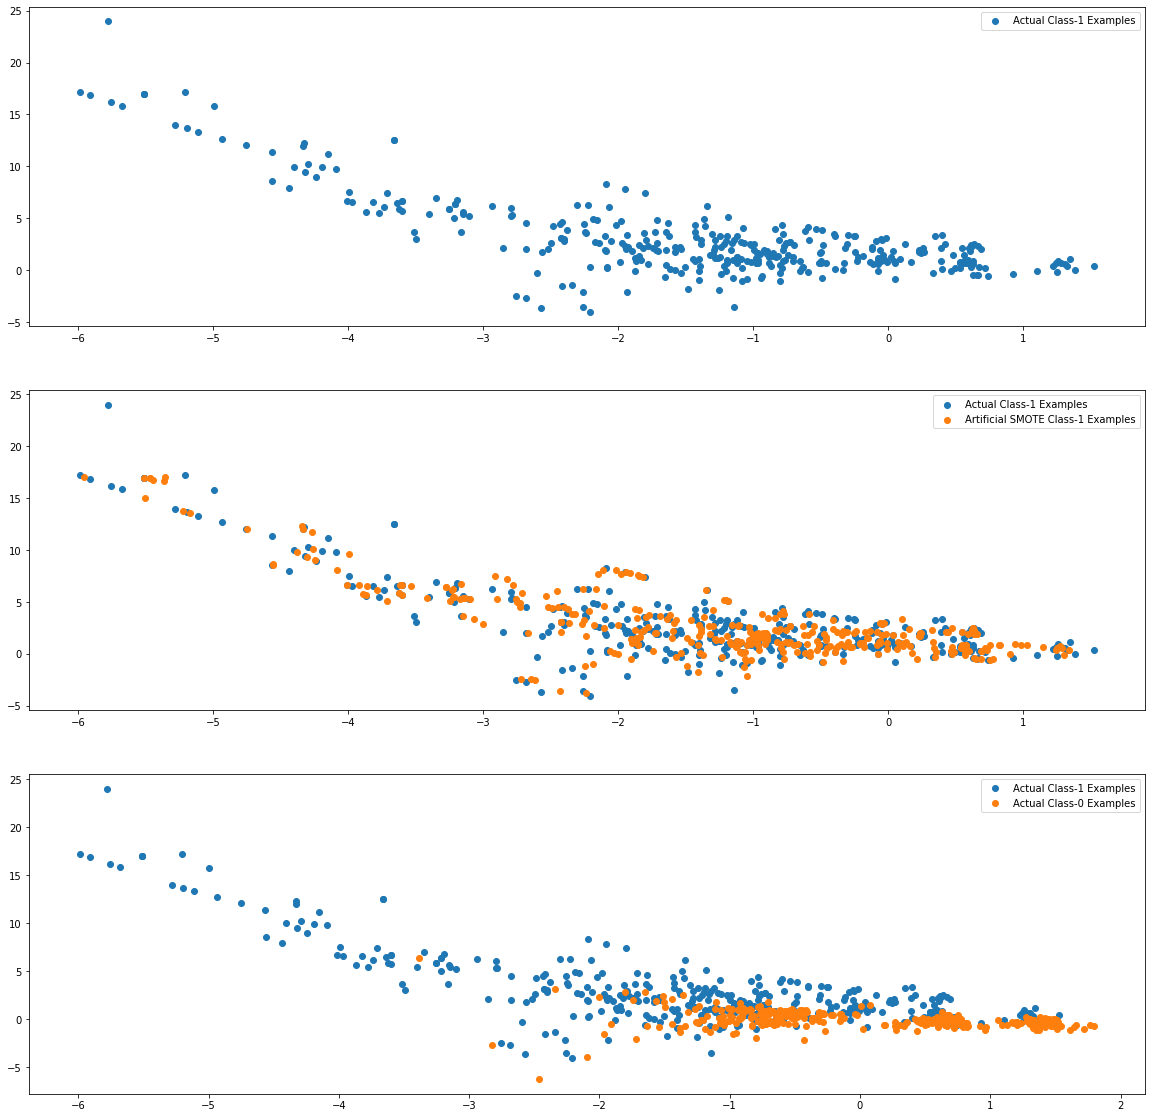

In [44]:
sm = over_sampling.SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = sm.fit_resample(X_test, y_test)

## Artificial minority samples and corresponding minority labels from SMOTE are appended
## below X_train and y_train respectively
## So to exclusively get the artificial minority samples from SMOTE

X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

##### 2.1)Logistic Regression

In [63]:
for i in num_c:
    lr_sm = LogisticRegression(C=i, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=1000, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
    lr_sm.fit(X_train_smote, y_train_smote)
    y_pred_os = lr_sm.predict_proba(X_test)
    print('C : ',i,' ROC Score ',roc_auc_score(y_test, y_pred_os[:,1])) 

C :  0.01  ROC Score  0.9834102642428488
C :  0.1  ROC Score  0.9828751295493992
C :  20  ROC Score  0.9828002701660923
C :  30  ROC Score  0.9828000115844573
C :  100  ROC Score  0.9827998391967007


##### 2.2)XGBoost

In [65]:
param_grid = {'learning_rate': [0.2, 0.6], 
          'subsample': [0.3, 0.6, 0.9],
          'max_depth' : [2,3,5]
          }          

# specify model
xgb_model_sm = XGBClassifier(n_estimators=200)

# set up GridSearchCV()
model_cv_sm = GridSearchCV(estimator = xgb_model_sm, 
                          param_grid = param_grid, 
                          scoring= 'roc_auc', 
                          cv = StratifiedKFold(n_splits=5, shuffle=True), 
                          verbose = 2,
                          n_jobs=-1,
                          return_train_score=True)  
model_cv_sm.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
y_pred_sm = model_cv_sm.predict(X_test_smote)
print(roc_auc_score(y_test_smote, y_pred_sm))
#print the optim0000um value of hyperparameters
print(model_cv_sm.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 87.8min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 238.1min finished


0.9573012765658152
{'learning_rate': 0.2, 'max_depth': 5, 'subsample': 0.9}


In [21]:
clf_sm = XGBClassifier(max_depth=5, n_estimators=200,learning_rate = 0.6, subsample = 0.9,objective = 'binary:logistic')  #initialise the model with optimum hyperparameters
clf_sm.fit(X_train_smote, y_train_smote)
y_pred_sm_f = clf_sm.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_sm_f[:,1])) #print the evaluation score on the X_test by choosing the best evaluation metric

0.9903811941506765


####  3)ADASYN

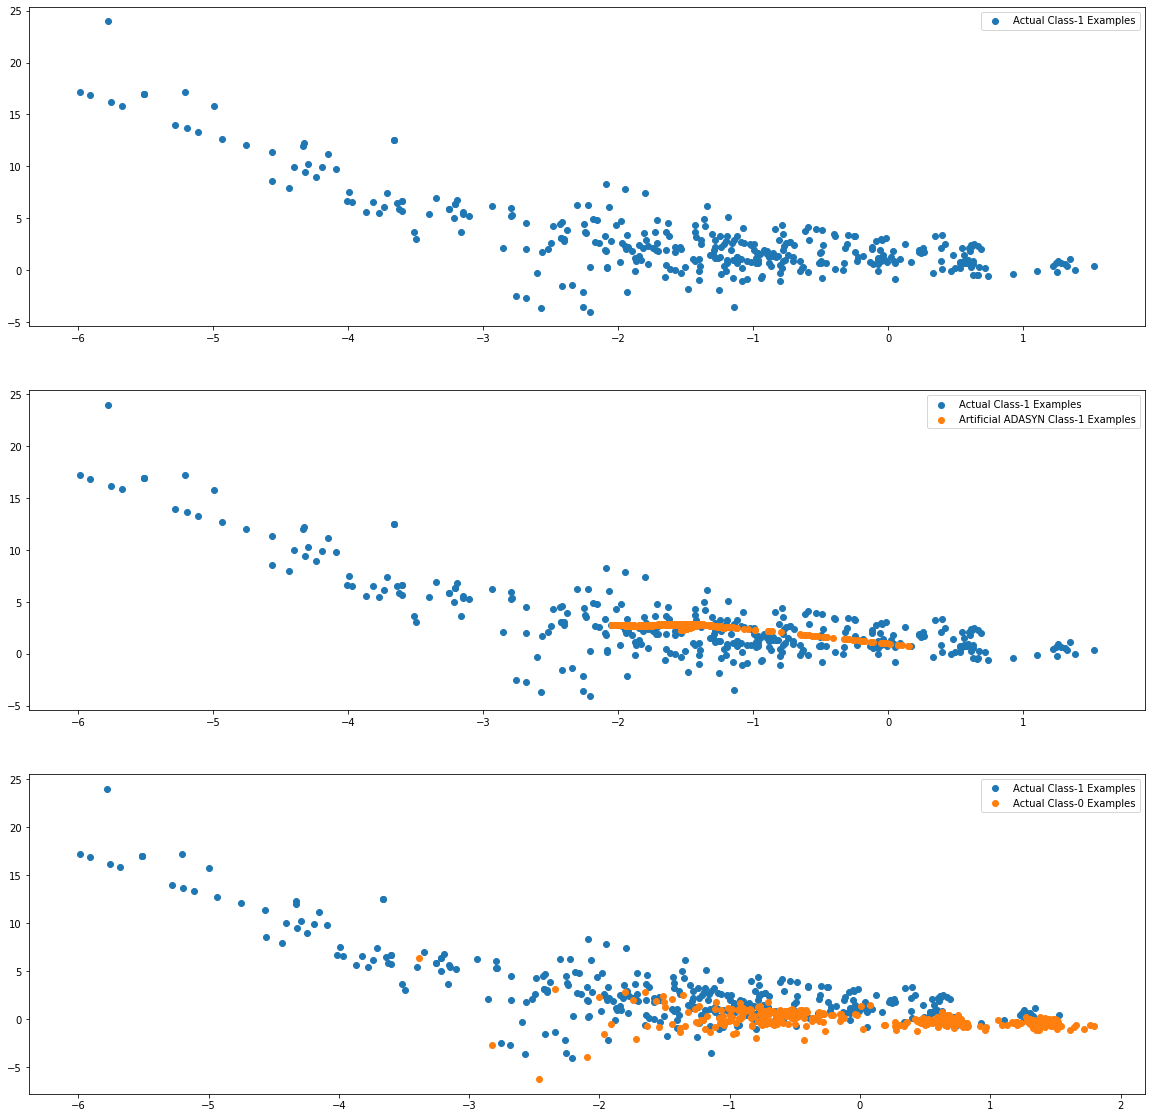

In [22]:
ada = over_sampling.ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
X_test_adasyn, y_test_adasyn = ada.fit_resample(X_test, y_test)

# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN

X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

###### 3.1)Logistic Regression

In [23]:
num_C = [0.01,0.1,20,30,100] 
from sklearn.metrics import roc_auc_score
for i in num_C:

    lr_1 = LogisticRegression(C=i,penalty='l2', solver='lbfgs', 
                          max_iter=1000,
                          random_state=1000, tol=0.0001, verbose=0)
    lr_1.fit(X_train_adasyn, y_train_adasyn)
    y_pred_l1 = lr_1.predict(X_test)
    print("C",i,"ROC AUC: ",roc_auc_score(y_test, y_pred_l1))

C 0.01 ROC AUC:  0.9298677475608856
C 0.1 ROC AUC:  0.9293812693117385
C 20 ROC AUC:  0.9293343798419411
C 30 ROC AUC:  0.9293285186582165
C 100 ROC AUC:  0.9293285186582165


###### 3.2)Random Forest

In [26]:
random_grid = {'max_depth': [2,6,10,14],
          'n_estimators': [50,100,150]}

#perform hyperparameter tuning

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring= 'roc_auc',
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1,return_train_score=True)
# +
rf_random.fit(X_train_adasyn, y_train_adasyn)

print(rf_random.best_params_)
#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


c:\users\adity\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 48.5min finished


{'n_estimators': 150, 'max_depth': 14}


In [27]:
clf2 = RandomForestClassifier(n_jobs=-1,max_depth=14,n_estimators=100)  
clf2.fit(X_train_adasyn, y_train_adasyn)
y_pred_un = clf2.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_un[:,1])) 

0.9840601660852603


##### 3.3)XGBoost

In [29]:
param_grid = {'learning_rate': [0.2, 0.6], 
          'subsample': [0.3, 0.6, 0.9],
          'max_depth' : [2,3,5]
          }          

# specify model
xgb_model_ad = XGBClassifier(n_estimators=200)

# set up GridSearchCV()
model_cv_ad = GridSearchCV(estimator = xgb_model_ad, 
                          param_grid = param_grid, 
                          scoring= 'roc_auc', 
                          cv = StratifiedKFold(n_splits=5, shuffle=True), 
                          verbose = 2,
                          n_jobs=-1,
                          return_train_score=True)  
model_cv_ad.fit(X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
y_pred_ad = model_cv_ad.predict(X_test_adasyn)
print(roc_auc_score(y_test_adasyn, y_pred_ad))
#print the optimum value of hyperparameters
print(model_cv_ad.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 90.1min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 248.9min finished


0.867391066213835
{'learning_rate': 0.6, 'max_depth': 5, 'subsample': 0.9}


In [30]:
clf_ad = XGBClassifier(max_depth=5, n_estimators=200,learning_rate = 0.6, subsample = 0.6,objective = 'binary:logistic')  #initialise the model with optimum hyperparameters
clf_ad.fit(X_train_adasyn, y_train_adasyn)
y_pred_ad_f = clf_ad.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_ad_f[:,1])) 

0.9847367880299458


Top var = 14
2nd Top var = 4
3rd Top var = 7


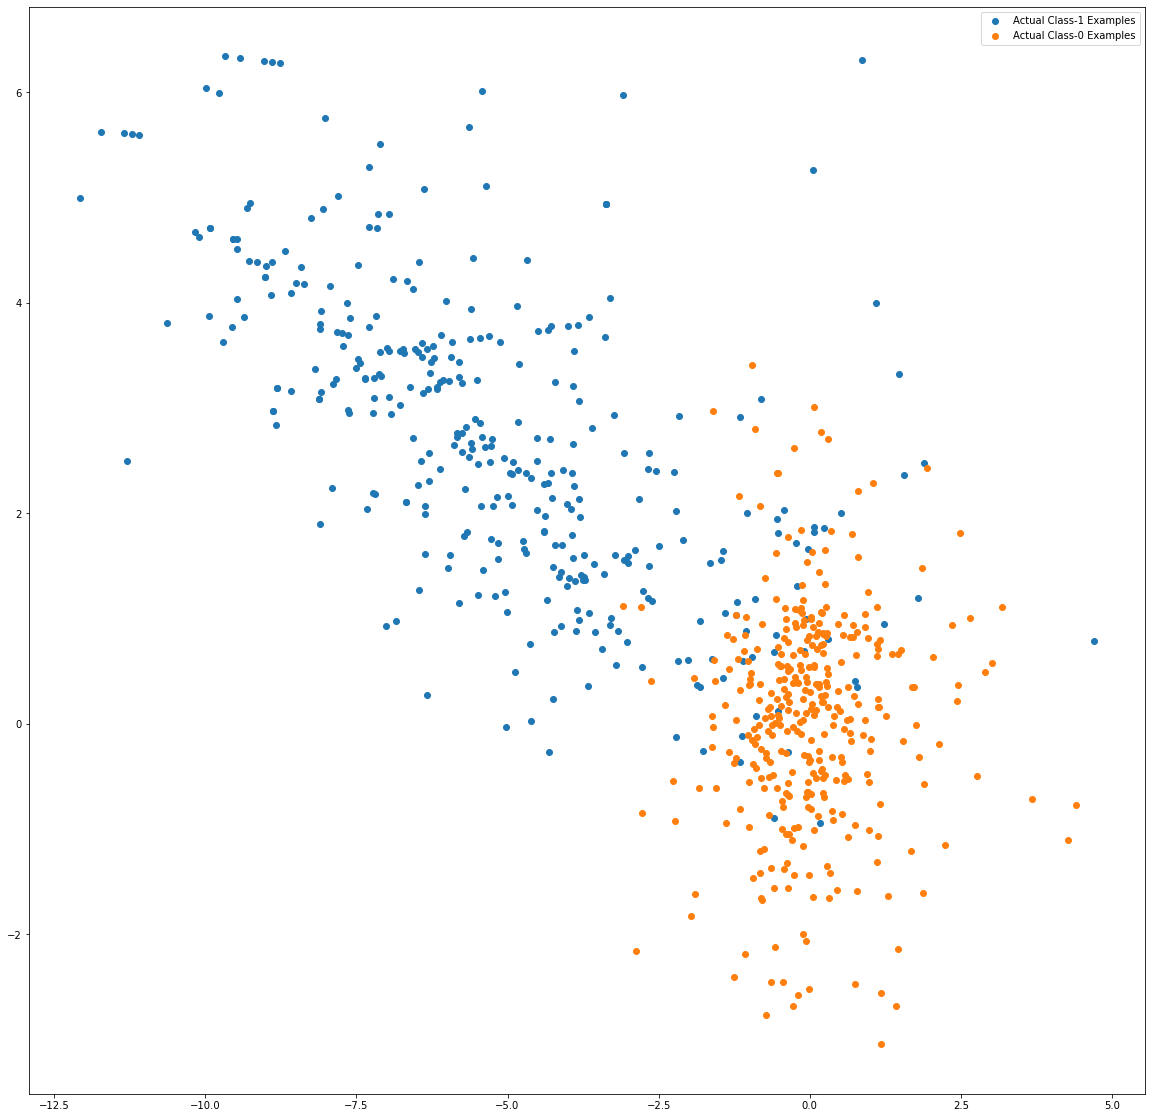

In [32]:
# Ploting Important Features 
var_imp = []
for i in clf_final.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf_final.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf_final.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf_final.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf_final.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf_final.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

Defining Function To Find Probabilities Transaction To Be Fraudulent

In [35]:
def metrics_dataframe(actual, predicted):
    confusion = confusion_matrix(actual, predicted)
    
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    specificity = TN/float(TN+FP)
    accuracy = accuracy_score(actual, predicted)
    F1_score = f1_score(actual, predicted)
    precision = precision_score(actual, predicted)
    recall = recall_score(actual, predicted)
    false_positive_rate = FP/float(TN+FP)
    positive_predictive_value = TP/float(TP+FP)
    negative_predictive_value = TN/float(TN+ FN)
    
    return_data = {'Metric': ['Specificity', 'Accuracy', 'F1 Score','Precision', 'Sensitivity/Recall', 'False Positive Rate',
                             'Positive Predictive Value', 'Negative Predictive Value'],
                   'Score': [specificity, accuracy,F1_score, precision, recall, false_positive_rate, positive_predictive_value,
                            negative_predictive_value]}
    return pd.DataFrame.from_dict(return_data)

In [36]:
#Predicting the probabilities
y_pred_final = pd.DataFrame({'converted':y_test,'converted_probability':y_pred_final[:,1]})
y_pred_final.head()

,converted,converted_probability
43428,1,9.999996e-01
49906,0,1.047203e-09
29474,0,4.486894e-06
276481,0,1.670011e-09
278846,0,3.246381e-13


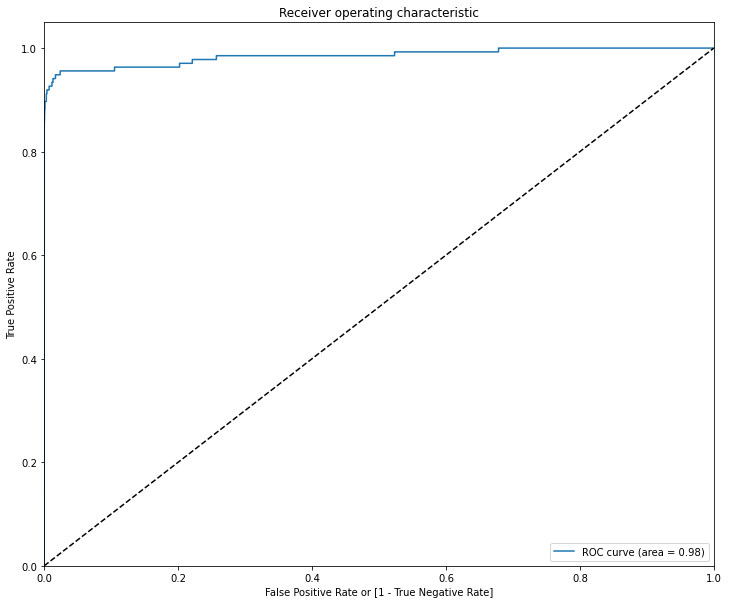

In [37]:
#### Print the FPR,TPR & select the best threshold from the roc curve

#Defining the function for plotting the ROC curve

from sklearn.metrics import roc_curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = roc_curve(y_pred_final.converted,
                                         y_pred_final.converted_probability, drop_intermediate=False )

#PLotting the ROC curve
plt.figure(figsize=(12, 10))
draw_roc(y_pred_final.converted, y_pred_final.converted_probability)

In [38]:
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

6.767454e-05


In [39]:
predicted_final_train = y_pred_final.converted_probability.map( lambda x: 1 if x > threshold else 0)

In [40]:
print(confusion_matrix(y_pred_final.converted, predicted_final_train))
metrics_dataframe(y_pred_final.converted, predicted_final_train)

[[83269  2038]
 [    7   129]]


,Metric,Score
0,Specificity,0.976110
1,Accuracy,0.976066
2,F1 Score,0.112028
3,Precision,0.059529
4,Sensitivity/Recall,0.948529
5,False Positive Rate,0.023890
6,Positive Predictive Value,0.059529
7,Negative Predictive Value,0.999916


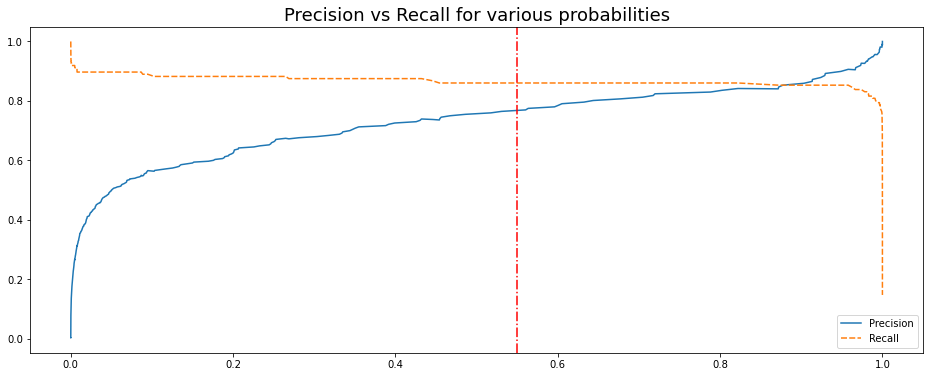

In [41]:
# Probability Distribution of Precision-Recall Trade-off
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_pred_final.converted, y_pred_final.converted_probability)

cutoff_df = pd.DataFrame({'Precision': pd.Series(p[:-1], index=thresholds),
              'Recall':pd.Series(r[:-1], index=thresholds)})
cutoff_df.head()
#Plotting the trade-off
plt.figure(figsize=(16, 6))
sns.lineplot(data=cutoff_df)
plt.title('Precision vs Recall for various probabilities', fontsize=18)
plt.axvline(0.55, color='r', linestyle='-.')

In [42]:
#Evaluating the metrics on optimum threshold
threshold=0.55
predicted_final_train = y_pred_final.converted_probability.map( lambda x: 1 if x > threshold else 0)
print(confusion_matrix(y_pred_final.converted, predicted_final_train))
metrics_dataframe(y_pred_final.converted, predicted_final_train)

[[85272    35]
 [   19   117]]


,Metric,Score
0,Specificity,0.999590
1,Accuracy,0.999368
2,F1 Score,0.812500
3,Precision,0.769737
4,Sensitivity/Recall,0.860294
5,False Positive Rate,0.000410
6,Positive Predictive Value,0.769737
7,Negative Predictive Value,0.999777
